<h1>Udacity AIND Project 2 Planning - Results Data Analysis with Tables, Barcharts and Piecharts
</h1>
 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# turn warning off
import warnings
warnings.filterwarnings('ignore')

In [256]:
# multi bar barchart

def plot_multi_barchart_twobar(data, columns, title, xlabel, ylabel):
    
    # set figure width and height
    fig = plt.figure(figsize=(8,5))
        
    ax1 = None
    ax2 = None
        
    # graph visual settings
    bar_width = 0.3
    opacity = 0.9
    
    colors = ['orange', 'lightblue', 'lightgreen', 'lightpurple']
    
    # add a set of bars - max 2 bars for now, not tested with three bars
    for i, col in enumerate(columns):

        # 1st bar
        if i == 0:
            ax1 = fig.add_subplot(111)
            
            data[col].plot(kind='bar', color=colors[i], ax=ax1, width=bar_width, position=(2-i), label=col, alpha=opacity)

            ax1.set_ylabel(col)
            ax1.legend(loc=2)

            # grid lines
            ax1.set_axisbelow(True)
            ax1.grid()     

        # 2nd bar
        else:
            ax2 = ax1.twinx() # add another axis share the same x-axis

            data[col].plot(kind='bar', color=colors[i], ax=ax2, width=bar_width, position=(2-i), label=col, alpha=opacity)

            ax2.set_ylabel(col)
            ax2.legend(loc=1) 

            # grid lines
            # ax1.set_axisbelow(True)
            # ax1.grid() 

    
    # labels
    plt.xlabel(xlabel)
#    plt.ylabel(ylabel)
    plt.title(title)

    # layout all compacted and not cropped    
    plt.tight_layout()

    # render    
    plt.show()
    
def handle_data(df):
    number_of_search_algo = 11
    n = number_of_search_algo
    
    # air cargo problem 1
    acp1 = df[:n]
    # air cargo problem 2
    acp2 = df[n:n*2]
    # air cargo problem 3
    acp3 = df[n*2:n*3]
    # air cargo problem 4
    acp4 = df[n*3:n*4]

    # join all 4 problems data as a list, loop to plot each
    data = [acp1, acp2, acp3, acp4]
    
    return data


In [268]:
from IPython.display import display, HTML

def report_table(df):
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        display(HTML('<hr />'))
        display(HTML('Air Cargo Problem '+str(i+1)))
        display(d)


In [271]:
def report_table_1():
    df = pd.read_csv('./report/run_search_result_data1_actionsexpansions.csv')
    report_table(df)
    

In [272]:
report_table_1()

,search algorithm,Actions,Expansions
0,breadth_first_search,20,43
1,depth_first_graph_search,20,21
2,uniform_cost_search,20,60
3,greedy_h_unmet_goals,20,7
4,greedy_h_pg_levelsum,20,6
5,greedy_h_pg_maxlevel,20,6
6,greedy_h_pg_setlevel,20,6
7,astar_h_unmet_goals,20,50
8,astar_h_pg_levelsum,20,28
9,astar_h_pg_maxlevel,20,43


,search algorithm,Actions,Expansions
11,breadth_first_search,72,3343
12,depth_first_graph_search,72,624
13,uniform_cost_search,72,5154
14,greedy_h_unmet_goals,72,17
15,greedy_h_pg_levelsum,72,9
16,greedy_h_pg_maxlevel,72,27
17,greedy_h_pg_setlevel,72,9
18,astar_h_unmet_goals,72,2467
19,astar_h_pg_levelsum,72,357
20,astar_h_pg_maxlevel,72,2887


,search algorithm,Actions,Expansions
22,breadth_first_search,88,14663
23,depth_first_graph_search,88,408
24,uniform_cost_search,88,18510
25,greedy_h_unmet_goals,88,25
26,greedy_h_pg_levelsum,88,14
27,greedy_h_pg_maxlevel,88,21
28,greedy_h_pg_setlevel,88,35
29,astar_h_unmet_goals,88,7388
30,astar_h_pg_levelsum,88,369
31,astar_h_pg_maxlevel,88,9580


,search algorithm,Actions,Expansions
33,breadth_first_search,104,99736
34,depth_first_graph_search,104,25174
35,uniform_cost_search,104,113339
36,greedy_h_unmet_goals,104,29
37,greedy_h_pg_levelsum,104,17
38,greedy_h_pg_maxlevel,104,56
39,greedy_h_pg_setlevel,104,107
40,astar_h_unmet_goals,104,34330
41,astar_h_pg_levelsum,104,1208
42,astar_h_pg_maxlevel,104,62077


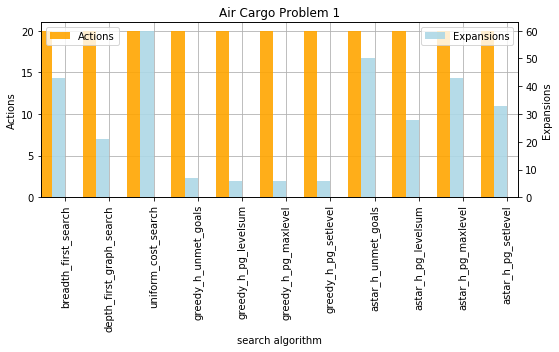

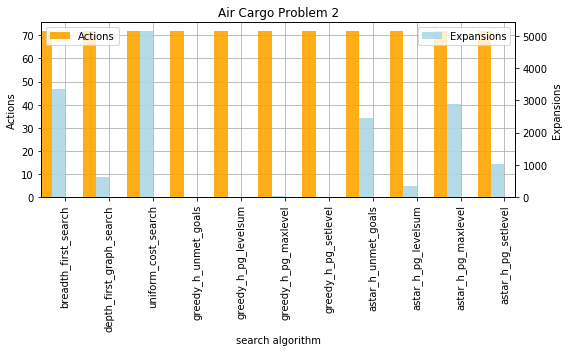

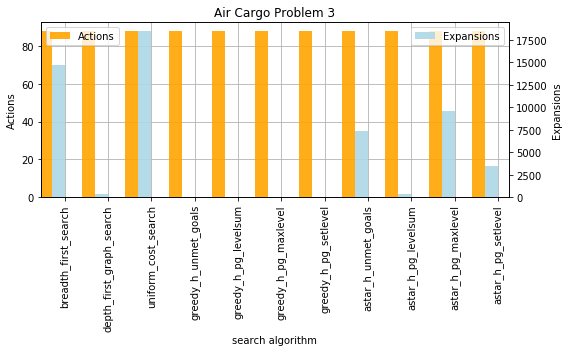

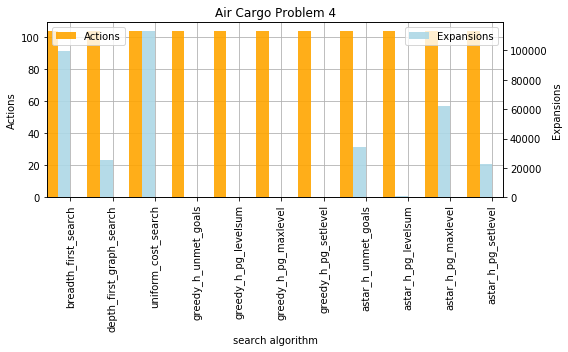

In [273]:
# for each air cargo problem, plot a multi barchart of the search algorithms
def report_barchart_1():
    # data
    df = pd.read_csv('./report/run_search_result_data1_actionsexpansions.csv')

    max_actions = max(df['Actions'])
    # 104
    max_expansions = max(df['Expansions'])
    # 113339

    # split data from dataframe into each 4 air cargo problems, convert into a list
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        d.set_index('search algorithm', inplace=True)
        plot_multi_barchart_twobar(data=d, 
                            columns=['Actions', 'Expansions'], 
                            title='Air Cargo Problem '+str(i+1), 
                            xlabel='Search Algorithms', 
                            ylabel='Values')

report_barchart_1()

In [275]:
def report_table_2():
    df = pd.read_csv('./report/run_search_result_data2_actionstime.csv')
    report_table(df)

report_table_2()

,search algorithm,Actions,Time
0,breadth_first_search,20,0.023812
1,depth_first_graph_search,20,0.009619
2,uniform_cost_search,20,0.017927
3,greedy_h_unmet_goals,20,0.001634
4,greedy_h_pg_levelsum,20,0.730893
5,greedy_h_pg_maxlevel,20,0.117956
6,greedy_h_pg_setlevel,20,0.882086
7,astar_h_unmet_goals,20,0.011246
8,astar_h_pg_levelsum,20,0.534908
9,astar_h_pg_maxlevel,20,0.261163


,search algorithm,Actions,Time
11,breadth_first_search,72,0.337785
12,depth_first_graph_search,72,0.496396
13,uniform_cost_search,72,0.571889
14,greedy_h_unmet_goals,72,0.009137
15,greedy_h_pg_levelsum,72,3.692732
16,greedy_h_pg_maxlevel,72,2.649279
17,greedy_h_pg_setlevel,72,11.851161
18,astar_h_unmet_goals,72,0.673550
19,astar_h_pg_levelsum,72,106.944284
20,astar_h_pg_maxlevel,72,250.266467


,search algorithm,Actions,Time
22,breadth_first_search,88,0.947339
23,depth_first_graph_search,88,0.257007
24,uniform_cost_search,88,1.413229
25,greedy_h_unmet_goals,88,0.020584
26,greedy_h_pg_levelsum,88,11.837602
27,greedy_h_pg_maxlevel,88,3.709349
28,greedy_h_pg_setlevel,88,57.184571
29,astar_h_unmet_goals,88,1.376859
30,astar_h_pg_levelsum,88,156.706903
31,astar_h_pg_maxlevel,88,1259.335336


,search algorithm,Actions,Time
33,breadth_first_search,104,6.001157
34,depth_first_graph_search,104,1112.628074
35,uniform_cost_search,104,11.360931
36,greedy_h_unmet_goals,104,0.044850
37,greedy_h_pg_levelsum,104,14.502744
38,greedy_h_pg_maxlevel,104,10.107616
39,greedy_h_pg_setlevel,104,232.459051
40,astar_h_unmet_goals,104,4.113156
41,astar_h_pg_levelsum,104,776.447068
42,astar_h_pg_maxlevel,104,11914.101750


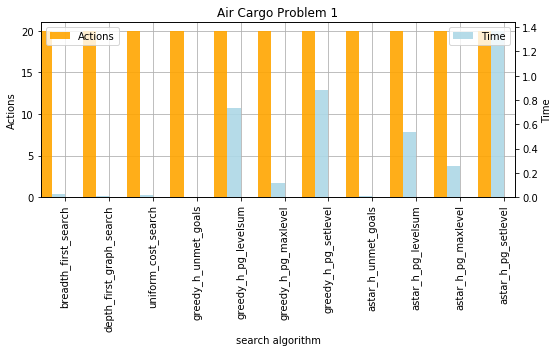

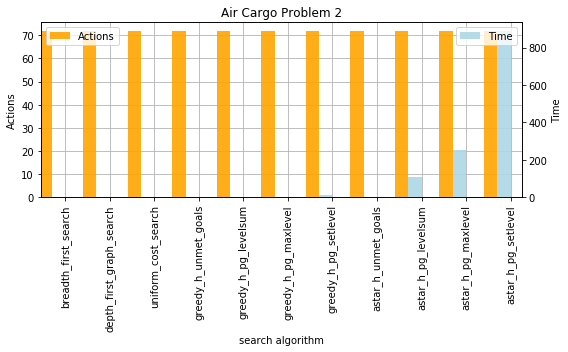

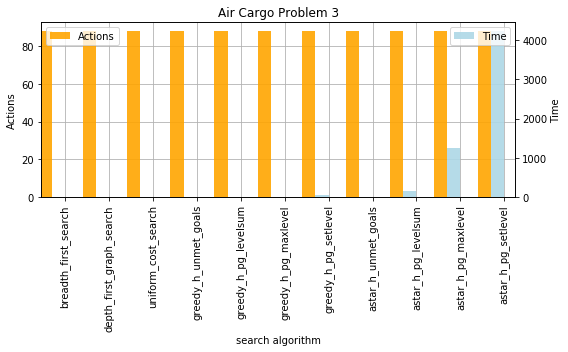

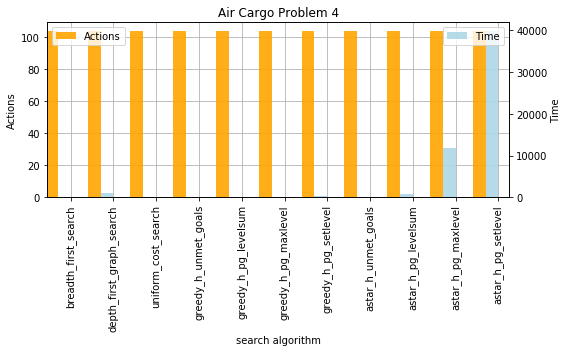

In [276]:
def report_barchart_2():
    # data
    df = pd.read_csv('./report/run_search_result_data2_actionstime.csv')

    # could remove last 2 row as time value is too big, will skew data, also not needed in project requirements
    # df = df[:-2]
        
    # split data from dataframe into each 4 air cargo problems, convert into a list
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        d.set_index('search algorithm', inplace=True)
        plot_multi_barchart_twobar(data=d, 
                            columns=['Actions', 'Time'], 
                            title='Air Cargo Problem '+str(i+1), 
                            xlabel='Search Algorithms', 
                            ylabel='Values')
        
report_barchart_2()

In [277]:
def report_table_3():
    df = pd.read_csv('./report/run_search_result_data3_planlength.csv')
    report_table(df)
    
report_table_3()

,search algorithm,Plan Length
0,breadth_first_search,6
1,depth_first_graph_search,20
2,uniform_cost_search,6
3,greedy_h_unmet_goals,6
4,greedy_h_pg_levelsum,6
5,greedy_h_pg_maxlevel,6
6,greedy_h_pg_setlevel,6
7,astar_h_unmet_goals,6
8,astar_h_pg_levelsum,6
9,astar_h_pg_maxlevel,6


,search algorithm,Plan Length
11,breadth_first_search,9
12,depth_first_graph_search,619
13,uniform_cost_search,9
14,greedy_h_unmet_goals,9
15,greedy_h_pg_levelsum,9
16,greedy_h_pg_maxlevel,9
17,greedy_h_pg_setlevel,9
18,astar_h_unmet_goals,9
19,astar_h_pg_levelsum,9
20,astar_h_pg_maxlevel,9


,search algorithm,Plan Length
22,breadth_first_search,12
23,depth_first_graph_search,392
24,uniform_cost_search,12
25,greedy_h_unmet_goals,15
26,greedy_h_pg_levelsum,14
27,greedy_h_pg_maxlevel,13
28,greedy_h_pg_setlevel,17
29,astar_h_unmet_goals,12
30,astar_h_pg_levelsum,12
31,astar_h_pg_maxlevel,12


,search algorithm,Plan Length
33,breadth_first_search,14
34,depth_first_graph_search,24132
35,uniform_cost_search,14
36,greedy_h_unmet_goals,18
37,greedy_h_pg_levelsum,17
38,greedy_h_pg_maxlevel,17
39,greedy_h_pg_setlevel,23
40,astar_h_unmet_goals,14
41,astar_h_pg_levelsum,15
42,astar_h_pg_maxlevel,14


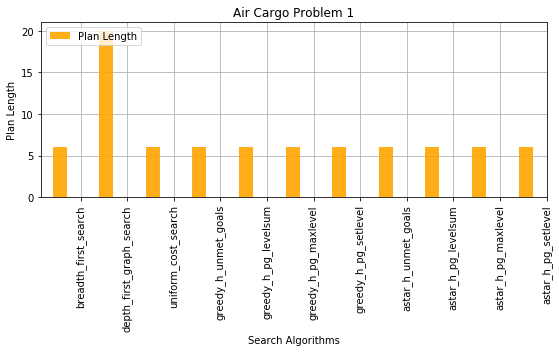

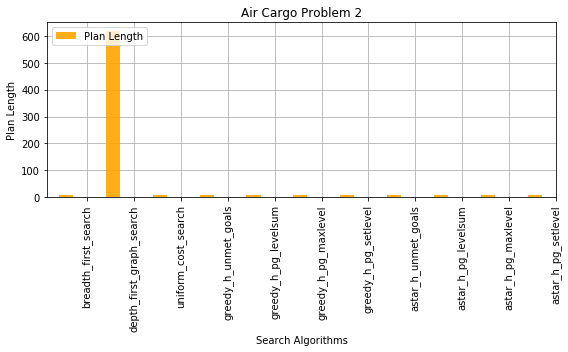

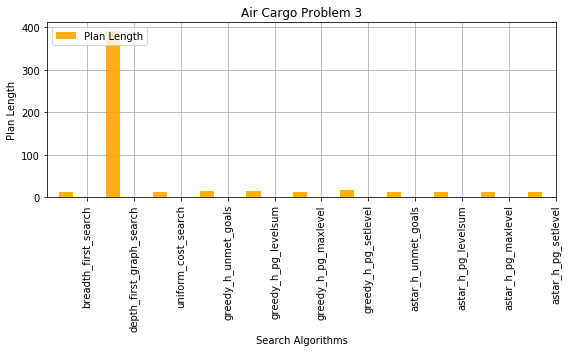

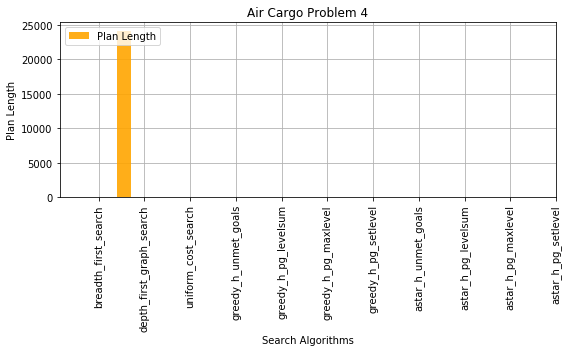

In [278]:
def report_barchart_3():
    # data
    df = pd.read_csv('./report/run_search_result_data3_planlength.csv')
            
    # split data from dataframe into each 4 air cargo problems, convert into a list
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        d.set_index('search algorithm', inplace=True)
        plot_multi_barchart_twobar(data=d, 
                            columns=['Plan Length'], 
                            title='Air Cargo Problem '+str(i+1), 
                            xlabel='Search Algorithms', 
                            ylabel='Values')
        
report_barchart_3()

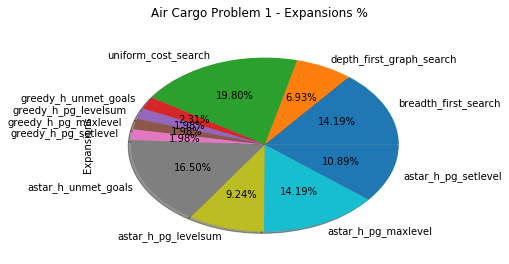

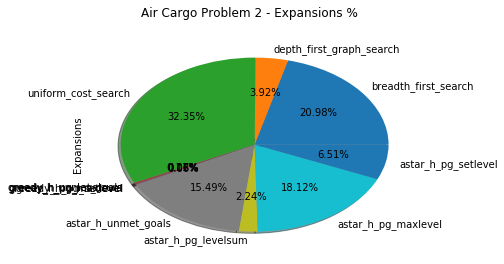

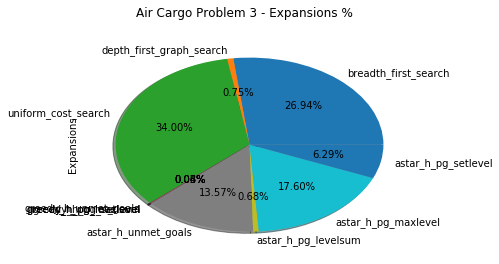

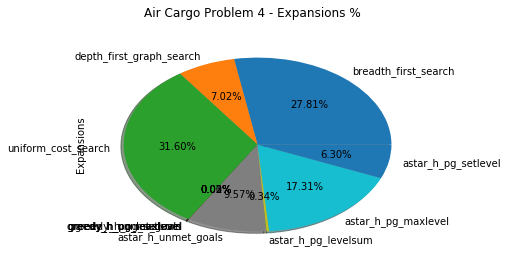

In [239]:
def report_pie_1():
    df = pd.read_csv('./report/run_search_result_data1_actionsexpansions.csv')
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        fig, ax = plt.subplots()
        fig.figsize=(18,5)
        
        d.set_index('search algorithm', inplace=True)
        d['Expansions'].plot.pie(subplots=True, autopct='%.2f%%', title='Air Cargo Problem '+str(i+1)+' - Expansions %', shadow=True, figsize=(18,5))

report_pie_1()


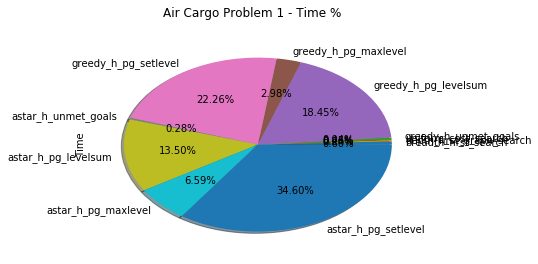

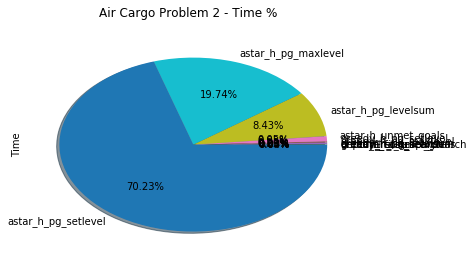

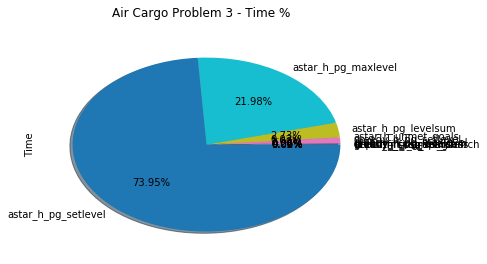

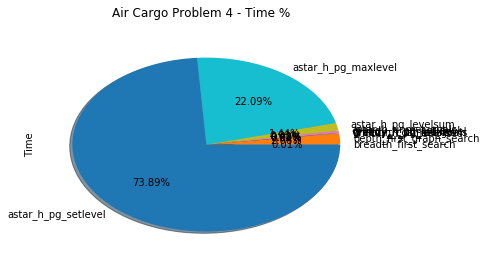

In [240]:
def report_pie_2():
    df = pd.read_csv('./report/run_search_result_data2_actionstime.csv')
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        fig, ax = plt.subplots()
        fig.figsize=(18,5)
        
        d.set_index('search algorithm', inplace=True)
        d['Time'].plot.pie(subplots=True, autopct='%.2f%%', title='Air Cargo Problem '+str(i+1)+' - Time %', shadow=True, figsize=(18,5))

report_pie_2()

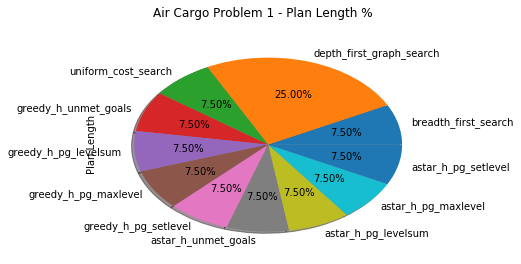

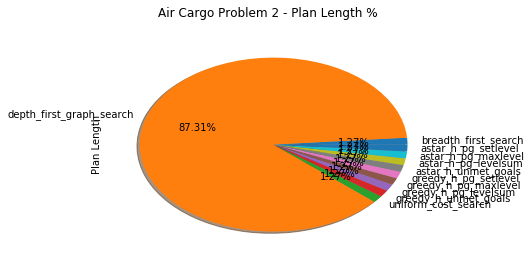

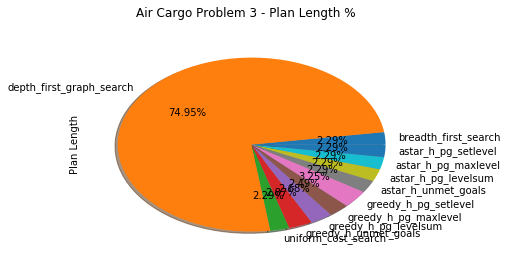

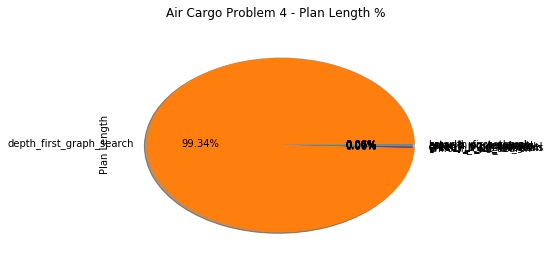

In [241]:
def report_pie_3():
    df = pd.read_csv('./report/run_search_result_data3_planlength.csv')
    data_4_problems = handle_data(df)

    for i, d in enumerate(data_4_problems):
        fig, ax = plt.subplots()
        fig.figsize=(18,5)
        
        d.set_index('search algorithm', inplace=True)
        d['Plan Length'].plot.pie(subplots=True, autopct='%.2f%%', title='Air Cargo Problem '+str(i+1)+' - Plan Length %', shadow=True, figsize=(18,5))

report_pie_3()

Use your results to answer the following questions:

<strong>Q1. Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?</strong>

Answer: 
Looking at the tables, Air Cargo Problem 1 results have the lowest number of actions of 20, the fastest search algorithm for air cargo problem 1 is 'greedy_best_first_graph_search' with 'h_unmet_goals', with run time of only 0.001634 seconds in my local environment.

<strong>Q2. Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)</strong>

<div>I assume very large domain needs large number of expansions with minimum of time.
Looking at the data of all four air cargo problems, the 'uniform cost search' search algorithm always have the highest numbers of expansions. </div>
<br/>
<div>The time taken running 'uniform cost search' using pypy is very small, not the smallest, but definitely one of the quickest.</div>

The number of expansions and time of 'uniform cost search' algorithm:
<ul>
    <li>Air Cargo Problem 1 is 60, in 0.017927114 second
    <li>Air Cargo Problem 2 is 5154, in 0.571888791 second
    <li>Air Cargo Problem 3 is 18510, in 1.413229058 second
    <li>Air Cargo Problem 4 is 113339, in 11.360931355 second
</ul>

<strong>Q3. Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?</strong>

In [227]:
# find the lowest average plan length of the 11 search algorithms
def Q3():
    # data
    df = pd.read_csv('./report/run_search_result_data3_planlength.csv')
            
    number_of_search_algo = 11
    n = number_of_search_algo
    
    # Join all 4 problems data as one dataframe, each problem is a column itself
    
    # air cargo problem 1
    acp1 = df[:n]
    # rename columns before combining data
    acp1.columns = ['search algorithm', 'Problem 1']
    # reset index column to search algorithm
    acp1.set_index('search algorithm', inplace=True)
    
    # air cargo problem 2
    acp2 = df[n:n*2]
    acp2.columns = ['search algorithm', 'Problem 2']
    acp2.set_index('search algorithm', inplace=True)
    
    # air cargo problem 3
    acp3 = df[n*2:n*3]
    acp3.columns = ['search algorithm', 'Problem 3']
    acp3.set_index('search algorithm', inplace=True)

    # air cargo problem 4
    acp4 = df[n*3:n*4]
    acp4.columns = ['search algorithm', 'Problem 4']
    acp4.set_index('search algorithm', inplace=True)

    data = acp1
    data['Problem 2'] = acp2
    data['Problem 3'] = acp3
    data['Problem 4'] = acp4
    
    # compute total plan length of each search algorithm
    data['Total Plan Length'] = data['Problem 1'] + data['Problem 2'] + data['Problem 3'] + data['Problem 4']
    
    # html view of data table values
    display(data)
    print () # line break
    
    # get search algo with the lowest total plan length
    min_plan_length = min(data['Total Plan Length'])
    
    print ('The lowest plan length is', min_plan_length)
    print() # line break
    
    # get which search algorithms have the same lowest plan length
    search_algos_lowest_plan_length = data.index[data['Total Plan Length'] == min_plan_length].tolist()
    
    print ('The search algorithms have the lowest plan length are:')
    for s in search_algos_lowest_plan_length:
        print (s)

Q3()


,Problem 1,Problem 2,Problem 3,Problem 4,Total Plan Length
search algorithm,,,,,
breadth_first_search,6,9,12,14,41
depth_first_graph_search,20,619,392,24132,25163
uniform_cost_search,6,9,12,14,41
greedy_h_unmet_goals,6,9,15,18,48
greedy_h_pg_levelsum,6,9,14,17,46
greedy_h_pg_maxlevel,6,9,13,17,45
greedy_h_pg_setlevel,6,9,17,23,55
astar_h_unmet_goals,6,9,12,14,41
astar_h_pg_levelsum,6,9,12,15,42



The lowest plan length is 41

The search algorithms have the lowest plan length are:
breadth_first_search
uniform_cost_search
astar_h_unmet_goals
astar_h_pg_maxlevel
astar_h_pg_setlevel


<div>I assume lowest plan length is the most optimal plan. </div>
<div>From data, these are the 5 search algorithms best for optimal plans:</div>
<ul>
    <li>breadth first search
    <li>uniform cost search
    <li>astar with 'h unmet goals'
    <li>astar with 'h pg maxlevel'
    <li>astar with 'h pg'setlevel'
</ul>